In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [18]:
df = pd.read_csv(r"..\data\data.csv")

In [19]:
df.head()

,Unnamed: 0,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,...,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
0,0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2.0,97.066,Qualifying,...,28.0,27.0,5.554,55,-0.109321,105.89063,0.056584,100.607381,NaN,NaN
1,1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2.0,97.555,Qualifying,...,12.0,43.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,-0.010306,103.479805
2,2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1.0,97.066,Qualifying,...,1.0,27.0,5.554,55,-0.109321,105.89063,-0.365247,116.706700,NaN,NaN
3,3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1.0,97.555,Qualifying,...,1.0,10.0,5.554,55,0.005000,105.23700,0.216800,104.273100,-0.074224,110.489900
4,4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2.0,97.555,Qualifying,...,11.0,1.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,NaN,NaN


In [20]:
df = df.drop(["Unnamed: 0"], axis=1)

In [21]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
categorial_inputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

numeric_na_features = [features for features in df.columns if df[features].dtype != "O" if df[features].isna().any()]
categorial_na_feature = [features for features in df.columns if df[features].dtype == "O" if df[features].isna().any()]

df[numeric_na_features] = numeric_imputer.fit_transform(df[numeric_na_features])
df[categorial_na_feature] = categorial_inputer.fit_transform(df[categorial_na_feature])

In [22]:
y = df["StintLen"]
X = df.drop(columns=['StintLen'],axis=1)

In [23]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3688, 113), (923, 113))

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9.8267
- Mean Absolute Error: 7.6712
- R2 Score: 0.4206
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1502
- Mean Absolute Error: 8.0222
- R2 Score: 0.3871


Lasso
Model performance for Training set
- Root Mean Squared Error: 11.6288
- Mean Absolute Error: 9.2661
- R2 Score: 0.1886
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.7968
- Mean Absolute Error: 9.3660
- R2 Score: 0.1721


Ridge
Model performance for Training set
- Root Mean Squared Error: 9.8273
- Mean Absolute Error: 7.6720
- R2 Score: 0.4205
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1502
- Mean Absolute Error: 8.0228
- R2 Score: 0.3871


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.3574
- Mean Absolute Error: 5.3771
- R2 Score: 0.6752
-------------------

# Result

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.791469
7,CatBoosting Regressor,0.789445
5,Random Forest Regressor,0.789304
4,Decision Tree,0.614515
3,K-Neighbors Regressor,0.532091
8,AdaBoost Regressor,0.435044
2,Ridge,0.387116
0,Linear Regression,0.387113
1,Lasso,0.172144


# XGBRegressor

In [29]:
xg_model = XGBRegressor(fit_intercept=True)
xg_model = xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

[13:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "fit_intercept" } are not used.

 Accuracy of the model is 79.15


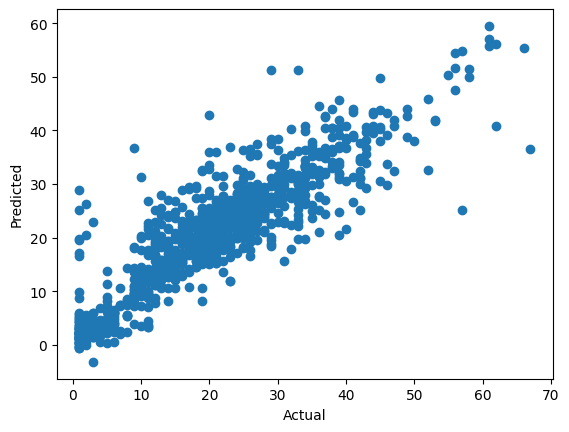

In [30]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='StintLen'>

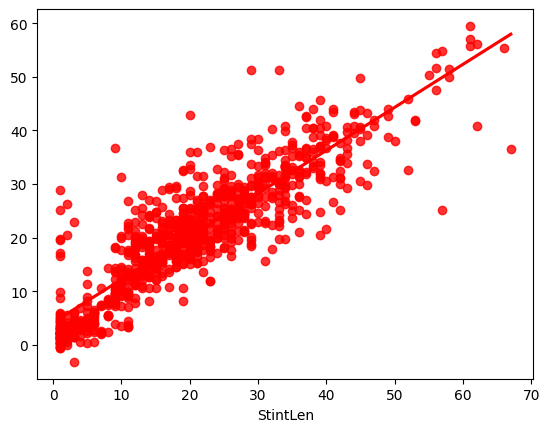

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1073,11.0,13.259428,-2.259428
2749,19.0,21.764214,-2.764214
1374,12.0,17.887526,-5.887526
4483,1.0,2.283709,-1.283709
3824,25.0,18.076855,6.923145
...,...,...,...
506,38.0,36.609886,1.390114
393,14.0,19.446194,-5.446194
2379,12.0,12.806828,-0.806828
1512,17.0,17.357729,-0.357729
